# IMPORTING PACKAGES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
#from scikitplot.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# LOADING DATASET

In [4]:
data=pd.read_csv("C:/Users/DELL/Downloads/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# DATA EXPLORATION

In [6]:
data.shape

(284807, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#printing the columns
print('Columns Name:',list(data))
print('Total Number of Columns: ',len(list(data)))

Columns Name: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Total Number of Columns:  31


In [9]:
#counting the number of genuine and fradulent Transactions
n_genuine=data[data['Class']==0]
n_fraud=data[data['Class']==1]

#displaying the number of genuine and fraudulent Transcations
print(' Genuine Transactions: ',len(n_genuine))
print(' Fradulent Transactions: ',len(n_fraud))

 Genuine Transactions:  284315
 Fradulent Transactions:  492


In [10]:
outlierfraction=float(len(n_fraud))/float(len(n_genuine))
print(outlierfraction)

0.0017304750013189597


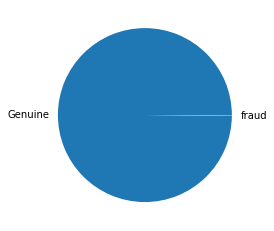

In [11]:
#plotting the pie plot of genuine and fraudulent transactions
plt.pie([len(n_genuine),len(n_fraud)],labels=['Genuine','fraud'],radius=1)
plt.show()

In [12]:
n_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
n_genuine.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# SEPERATING DATA INTO X AND Y

In [14]:

#here we put training data in x variable and target value in y variable
x,y=data.iloc[:,:-1],data.iloc[:,-1]


In [15]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# SPLITTING OF DATA INTO TRAINING AND TESTING DATA

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Building a Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# EVALUATING THE MODEL

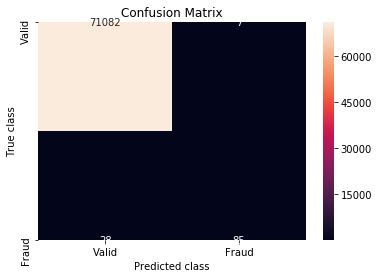

In [19]:
lables=['Valid','Fraud']
conf_matrix=confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix,xticklabels=lables,yticklabels=lables,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [20]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
print("The model used is random Forest classifier")
acc=accuracy_score(y_test,y_pred)
print("The accuracy Score is {}".format(acc))
prec=precision_score(y_test,y_pred)
print("The precision Score is {}".format(prec))
rec=recall_score(y_test,y_pred)
print("The recall Score is {}".format(rec))
f1=f1_score(y_test,y_pred)
print("The f1 Score is {}".format(f1))


The model used is random Forest classifier
The accuracy Score is 0.9995084407741356
The precision Score is 0.9239130434782609
The recall Score is 0.7522123893805309
The f1 Score is 0.8292682926829267


# LOGISTIC REGRESSION

In [21]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
pred=lr.predict(x_test)

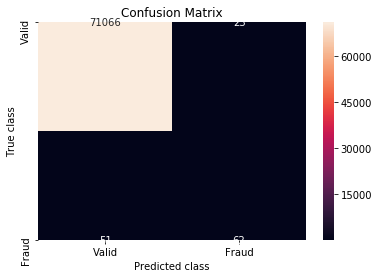

In [23]:
lables=['Valid','Fraud']
conf_matrix=confusion_matrix(y_test,pred)

sns.heatmap(conf_matrix,xticklabels=lables,yticklabels=lables,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [24]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
print("The model used is logistic regression classifier")
acc=accuracy_score(y_test,pred)
print("The accuracy Score is {}".format(acc))
prec=precision_score(y_test,pred)
print("The precision Score is {}".format(prec))
rec=recall_score(y_test,pred)
print("The recall Score is {}".format(rec))
f1=f1_score(y_test,pred)
print("The f1 Score is {}".format(f1))

The model used is logistic regression classifier
The accuracy Score is 0.9989607033510295
The precision Score is 0.7294117647058823
The recall Score is 0.5486725663716814
The f1 Score is 0.6262626262626262


# LINEAR SVM

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [26]:
svm_clf=LinearSVC()

In [27]:
svm_clf.fit(x_train,y_train)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [28]:
y_predi=svm_clf.predict(x_test)

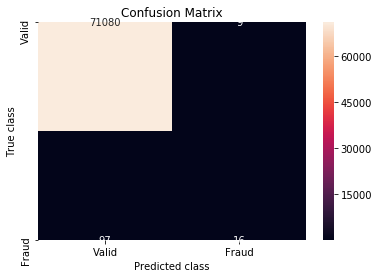

In [29]:
lables=['Valid','Fraud']
conf_matrix=confusion_matrix(y_test,y_predi)

sns.heatmap(conf_matrix,xticklabels=lables,yticklabels=lables,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [30]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
print("The model used is LinearSVC")
acc=accuracy_score(y_test,y_predi)
print("The accuracy Score is {}".format(acc))
prec=precision_score(y_test,y_predi)
print("The precision Score is {}".format(prec))
rec=recall_score(y_test,y_predi)
print("The recall Score is {}".format(rec))
f1=f1_score(y_test,y_predi)
print("The f1 Score is {}".format(f1))


The model used is LinearSVC
The accuracy Score is 0.9985112777730962
The precision Score is 0.64
The recall Score is 0.1415929203539823
The f1 Score is 0.2318840579710145


In [31]:
Algorithms=['RandomForest','Logisticregression','LinearSVM']
Accuracy=[0.995,0.9987,0.9984]
Precision=[0.946,0.611,0.6190]
recall=[0.786,0.584,0.1150]
final=pd.DataFrame({'Accuracy':Accuracy,'Algorithm':Algorithms,'Precision':Precision,'recall':recall})
final

,Accuracy,Algorithm,Precision,recall
0,0.9950,RandomForest,0.946,0.786
1,0.9987,Logisticregression,0.611,0.584
2,0.9984,LinearSVM,0.619,0.115


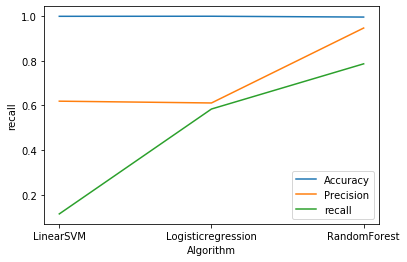

In [32]:
sns.lineplot(x='Algorithm',y='Accuracy',data=final,palette='hot',label='Accuracy')
sns.lineplot(x='Algorithm',y='Precision',data=final,palette='hot',label='Precision')
sns.lineplot(x='Algorithm',y='recall',data=final,palette='hot',label='recall')

